In [1]:
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
df = pd.read_csv('2018_2019_24-59mos_underweight_complete.csv')
origfeatures = df.columns
print ("original features count", len(origfeatures))
print ("original features", origfeatures)
df.head()

original features count 42
original features Index(['age_child', 'agemos', 'AgeGroup', 'sex_child', 'gastation',
       'place_delivery', 'assistd', 'typeofd', 'pregtype', 'bw_grams',
       'bw_status', 'ethnicity', 'age_mom', 'agegroup_mom', 'csc_mom',
       'psccat_mom', 'educ_mom', 'occup_mom', 'work_status_mom', 'age_hh',
       'agegroup_HH', 'sex_hh', 'educ_hh', 'psoc_hh', 'work_status_hh',
       'urbanity', 'hhsize', 'hhsize_code', 'drinkingwater', 'recipient_4ps',
       'toilet', 'electrct1', 'drinksafe', 'makesafe', 'wcooking', 'whands',
       'collect', 'burn', 'composting', 'dump', 'segregate', 'underweight'],
      dtype='object')


,age_child,agemos,AgeGroup,sex_child,gastation,place_delivery,assistd,typeofd,pregtype,bw_grams,...,drinksafe,makesafe,wcooking,whands,collect,burn,composting,dump,segregate,underweight
0,4,48,3,2,1,1,1,1,1,2400,...,0,0,2,2,0,0,1,0,0,1
1,3,34,1,2,1,1,1,1,1,2500,...,9,9,2,2,0,1,0,1,1,0
2,4,51,3,1,1,1,1,1,1,2500,...,0,0,2,2,0,0,1,0,0,1
3,4,51,3,2,1,0,1,1,1,3200,...,0,0,2,2,0,1,0,0,0,0
4,2,28,1,2,1,1,1,1,1,2800,...,9,9,2,2,0,1,0,1,0,1


In [5]:
data = df[["bw_grams","psoc_hh","age_hh","hhsize",
           "psccat_mom","drinkingwater","educ_mom",
           "underweight"]]

In [6]:
data.head()

,bw_grams,psoc_hh,age_hh,hhsize,psccat_mom,drinkingwater,educ_mom,underweight
0,2400,6,37,5,0,0,2,1
1,2500,99,54,10,2,1,1,0
2,2500,6,38,5,0,0,2,1
3,3200,6,36,7,0,0,2,0
4,2800,8,44,8,0,1,2,1


In [7]:
data.columns

Index(['bw_grams', 'psoc_hh', 'age_hh', 'hhsize', 'psccat_mom',
       'drinkingwater', 'educ_mom', 'underweight'],
      dtype='object')

In [8]:
display("Total number of of Duplicates present in data: %s" %data.duplicated().sum())
data = data.drop_duplicates()

'Total number of of Duplicates present in data: 387'

In [9]:
data = data.drop_duplicates()

In [10]:
display("Total number of of Duplicates present in data: %s" %data.duplicated().sum())

'Total number of of Duplicates present in data: 0'

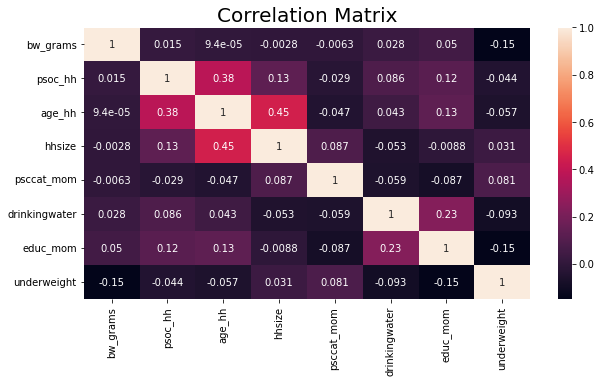

In [11]:
#checking correlation between the variables
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [12]:
data['underweight'].value_counts()

0    11091
1     3012
Name: underweight, dtype: int64

In [20]:
Final = df[["bw_grams","psoc_hh","age_hh","hhsize",
           "psccat_mom","drinkingwater","educ_mom"]]
Target =df['underweight']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final,Target,test_size = 0.2, random_state=42)

In [15]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.788
Accuracy score : 0.7922705314009661


C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))


Training score: 0.985
Accuracy score:  0.7643202208419599


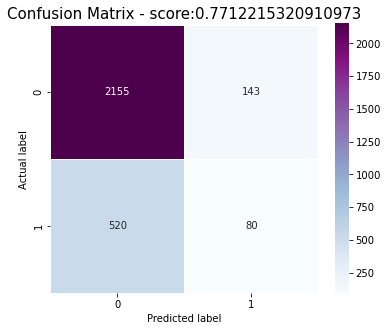

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2298
           1       0.36      0.13      0.19       600

    accuracy                           0.77      2898
   macro avg       0.58      0.54      0.53      2898
weighted avg       0.71      0.77      0.73      2898



In [17]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))


In [18]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = data[data.underweight==0]
df_2 = data[data.underweight==1]
 
# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=11091,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_2_upsampled])
 
# Display new class counts
df_upsampled.underweight.value_counts()
df_upsampled.reset_index(drop=True)

,bw_grams,psoc_hh,age_hh,hhsize,psccat_mom,drinkingwater,educ_mom,underweight
0,2500,99,54,10,2,1,1,0
1,3200,6,36,7,0,0,2,0
2,2700,8,44,8,0,1,3,0
3,3000,6,49,5,0,0,2,0
4,3500,7,46,7,0,1,1,0
...,...,...,...,...,...,...,...,...
22177,3000,9,31,5,0,0,2,1
22178,3200,99,63,10,0,0,2,1
22179,3000,7,38,7,0,0,1,1
22180,3100,7,28,5,2,1,2,1


In [19]:
df_upsampled.columns

Index(['bw_grams', 'psoc_hh', 'age_hh', 'hhsize', 'psccat_mom',
       'drinkingwater', 'educ_mom', 'underweight'],
      dtype='object')

In [21]:
Final1 =df_upsampled[["bw_grams","psoc_hh","age_hh","hhsize",
           "psccat_mom","drinkingwater","educ_mom"]]
Target1 =df_upsampled['underweight']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final1,Target1,test_size = 0.2, random_state=42)

In [23]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.588
Accuracy score : 0.5796709488393058


C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))

pred_prob_rf = r_pred.predict_proba(X_test)
rf_acc =accuracy_score(rf_pred,y_test)

Training score: 0.991
Accuracy score:  0.8906919089474871


Training score: 0.991
Accuracy score:  0.8906919089474871


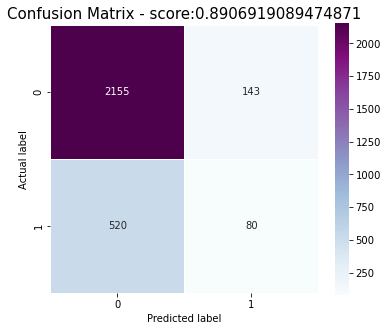

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1938
           1       0.96      0.84      0.90      2499

    accuracy                           0.89      4437
   macro avg       0.89      0.90      0.89      4437
weighted avg       0.90      0.89      0.89      4437



In [25]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(rf_pred,y_test))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(rf_pred,y_test))

pred_prob_rf = r_pred.predict_proba(X_test)

In [26]:
#OUTLIER DETECTION in CROP
#Function to calc lowerRange and UpperRange using 1.5IQR rule
def outlier(data1):
    #Sort in Ascending
    sorted(data1)
    #Q1 and Q3
    Q1,Q3 = np.nanpercentile(data1, [25,75])
    #Calc IQR
    IQR = Q3 - Q1
    #Calc lowerRange
    lowerRange = Q1 - (1.5 * IQR)
    #Calc upperRange
    upperRange = Q3 + (1.5 * IQR)
    #Return Ranges
    return lowerRange,upperRange

In [27]:
df_upsampled.columns

Index(['bw_grams', 'psoc_hh', 'age_hh', 'hhsize', 'psccat_mom',
       'drinkingwater', 'educ_mom', 'underweight'],
      dtype='object')

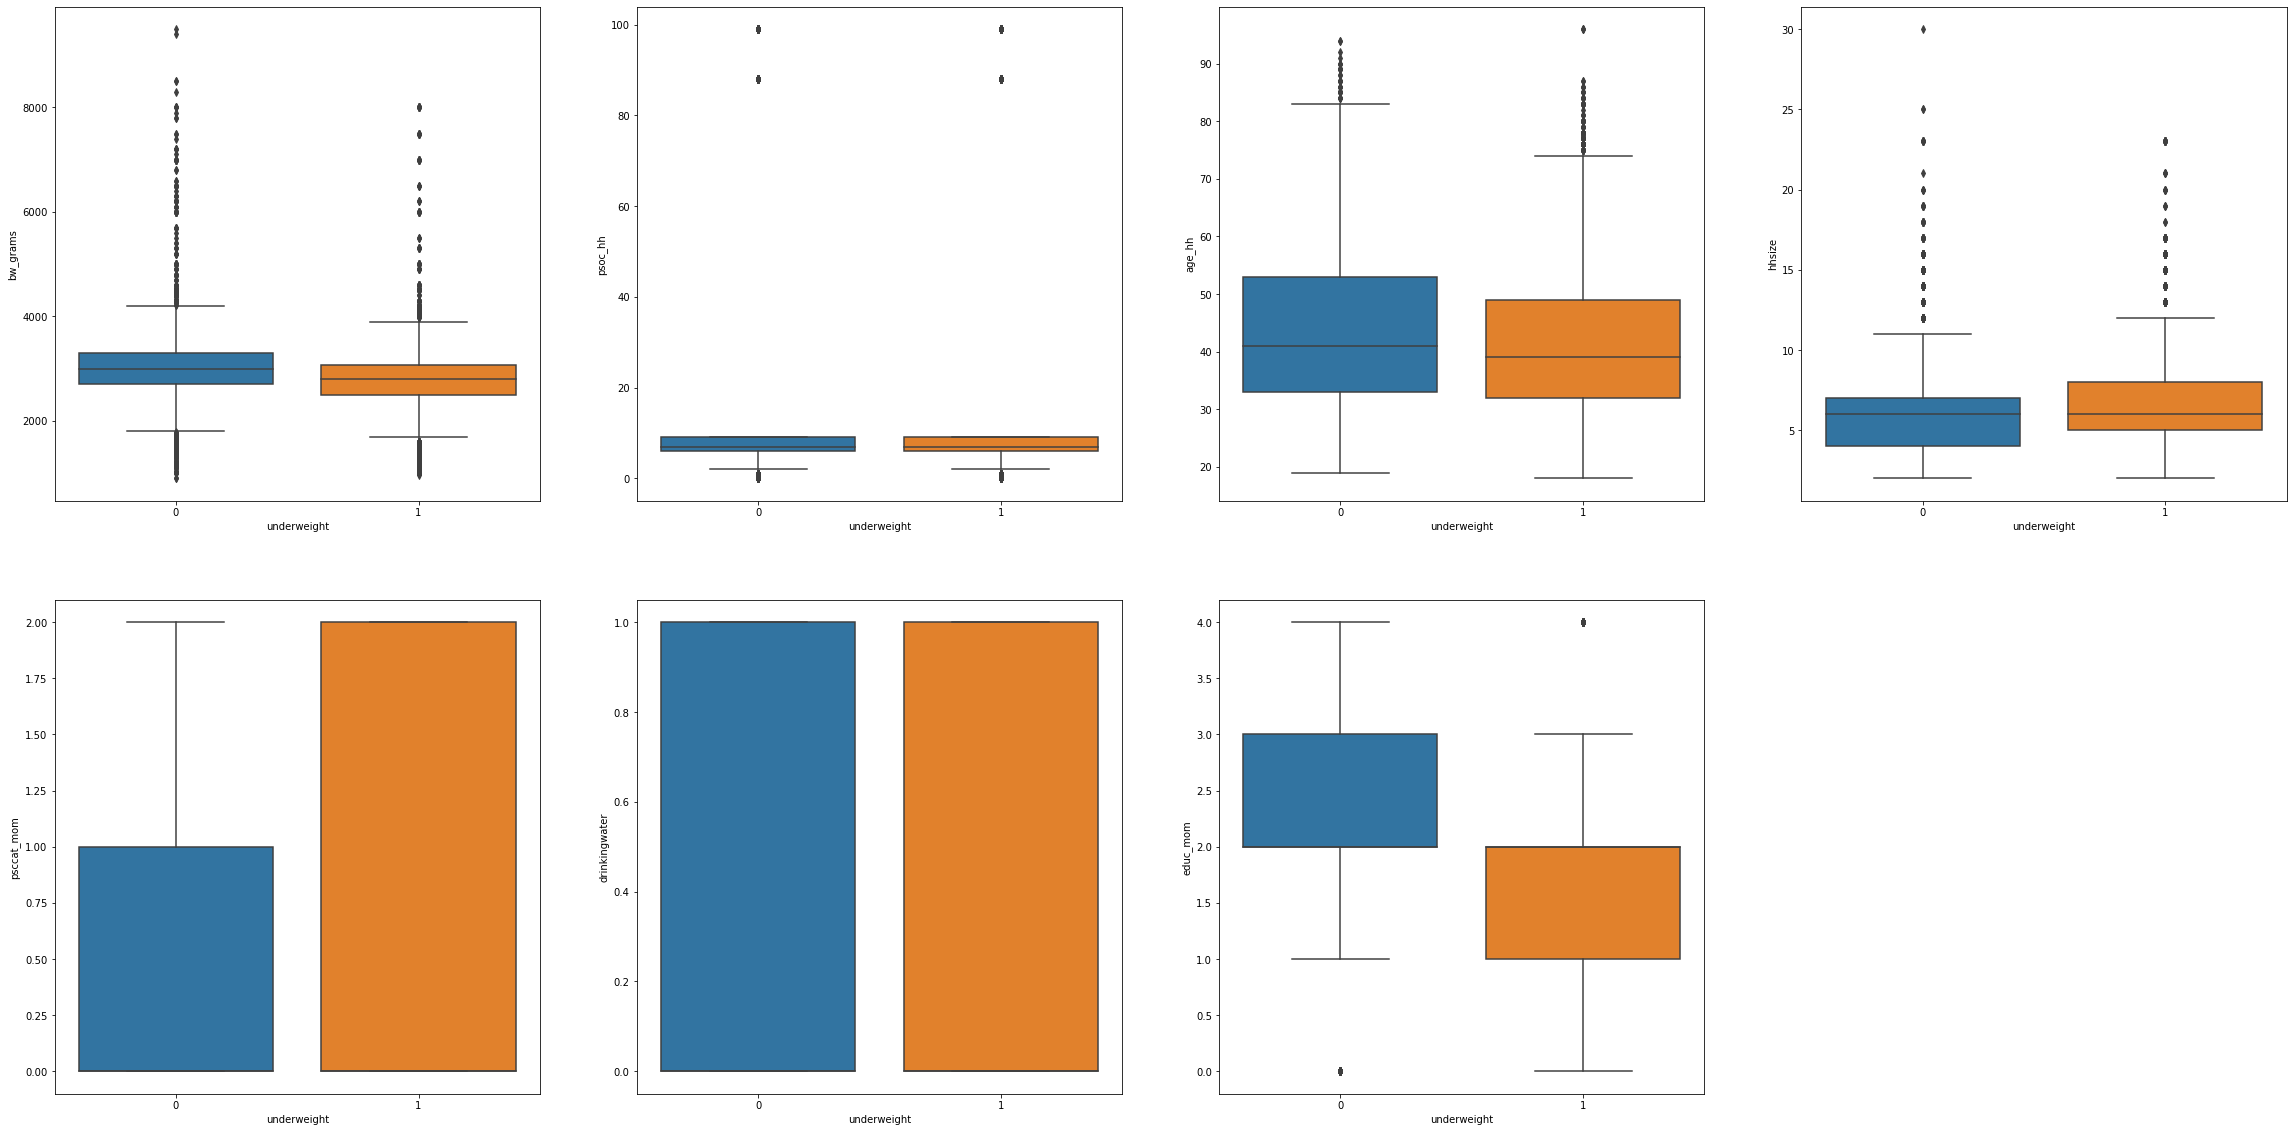

In [28]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="underweight", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('age_hh')
  
plt.subplot(2,4,4)
graph('hhsize')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('drinkingwater')

plt.subplot(2,4,7)
graph('educ_mom')
  
plt.show()

In [29]:
lr,ur=outlier(df_upsampled['hhsize'][df_upsampled.underweight==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.hhsize > ur) & (df_upsampled.underweight == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.hhsize < lr) & (df_upsampled.underweight == 0)],inplace=True)
df_upsampled.value_counts('underweight')

underweight
1    11091
0    10625
dtype: int64

In [30]:
lr,ur=outlier(df_upsampled['hhsize'][df_upsampled.underweight==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.hhsize > ur) & (df_upsampled.underweight == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.hhsize < lr) & (df_upsampled.underweight == 1)],inplace=True)
df_upsampled.value_counts('underweight')

underweight
1    10798
0    10625
dtype: int64

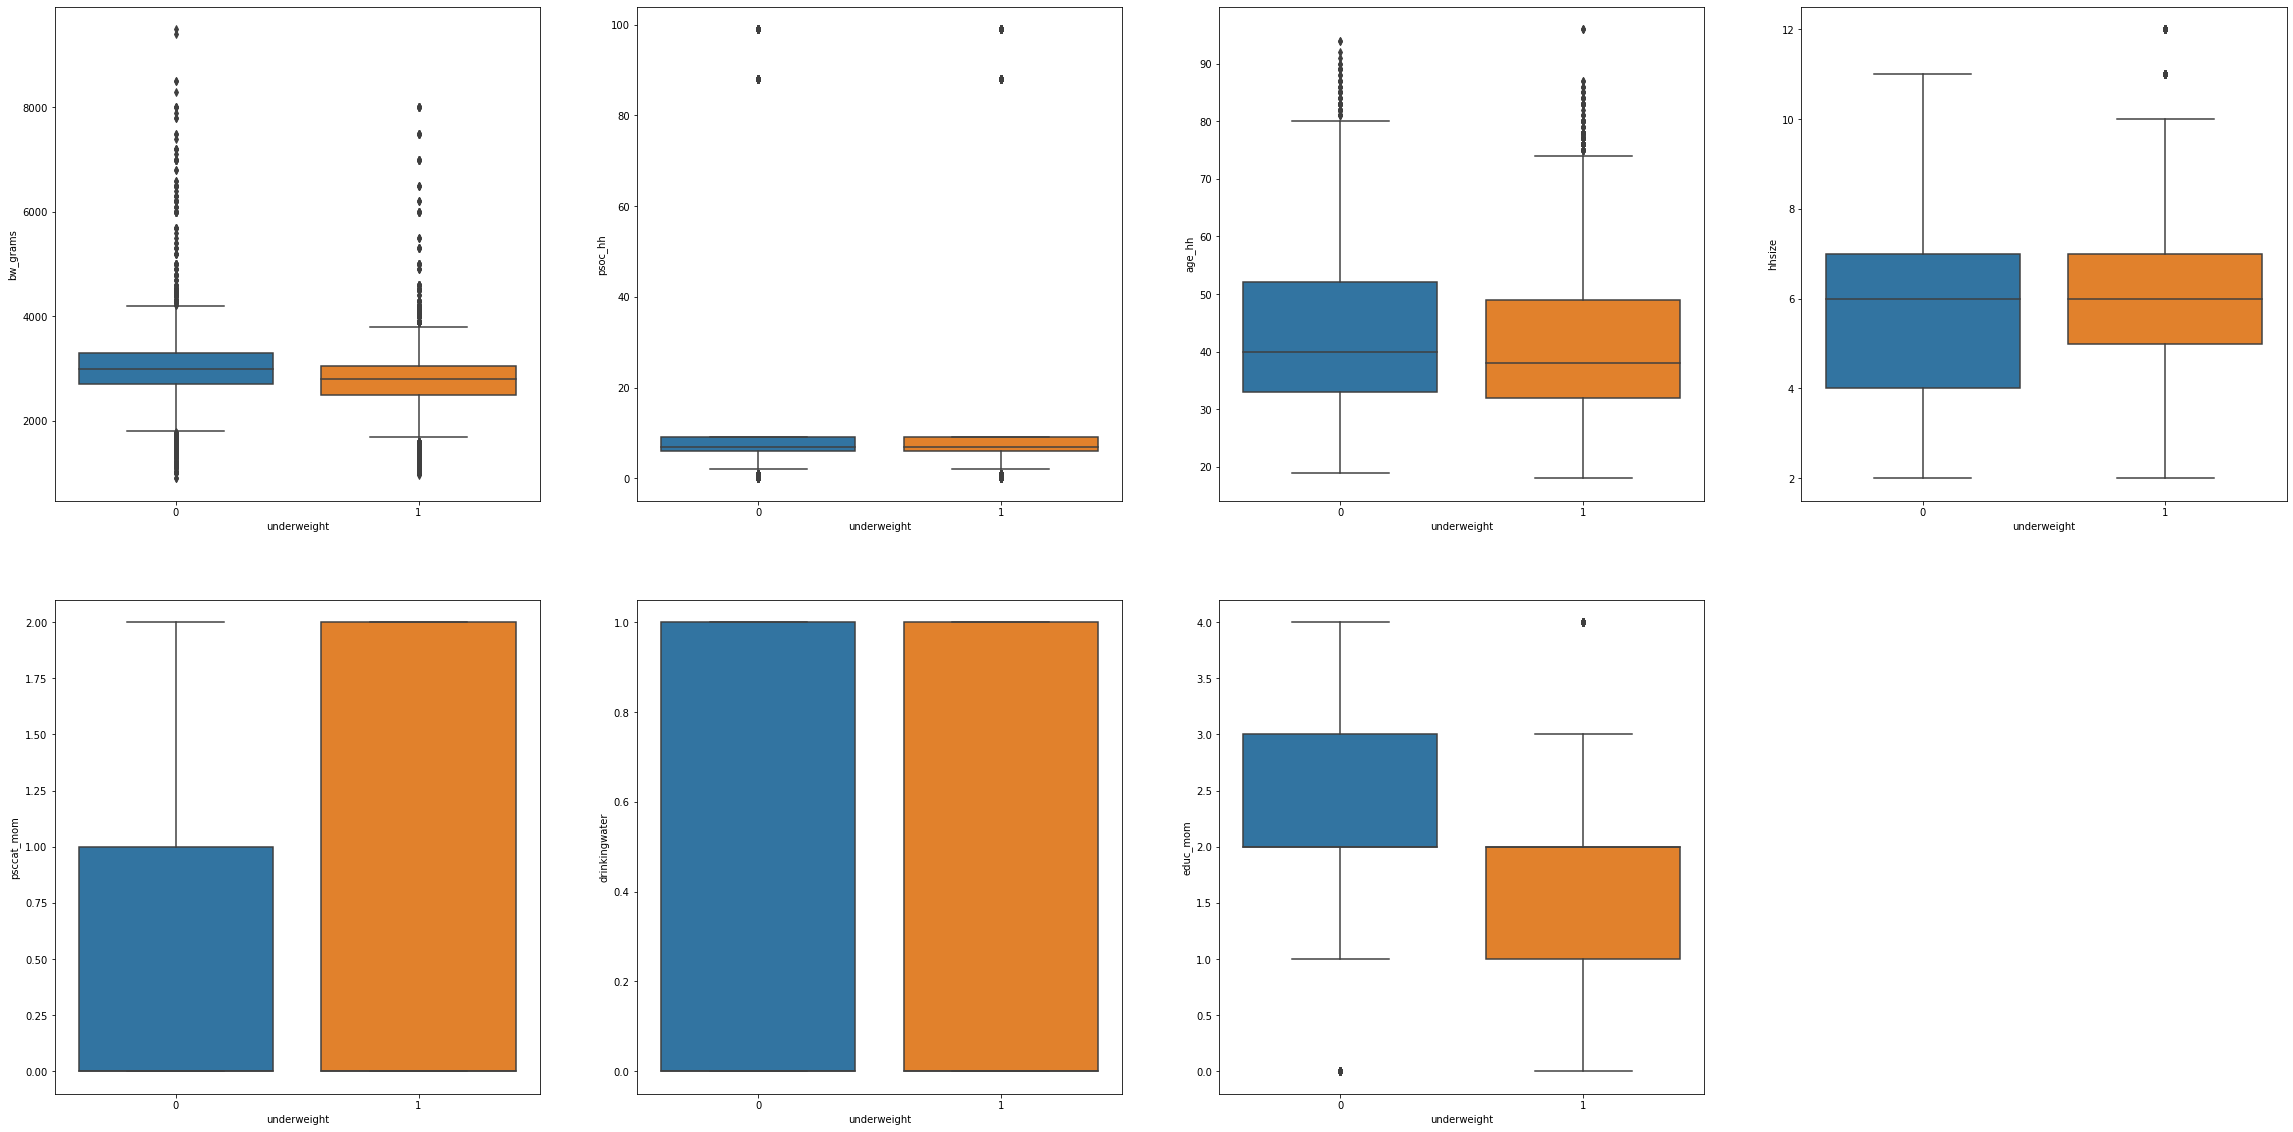

In [31]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="underweight", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('age_hh')
  
plt.subplot(2,4,4)
graph('hhsize')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('drinkingwater')

plt.subplot(2,4,7)
graph('educ_mom')
  
plt.show()

In [32]:
lr,ur=outlier(df_upsampled['hhsize'][df_upsampled.underweight==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.hhsize > ur) & (df_upsampled.underweight == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.hhsize < lr) & (df_upsampled.underweight == 1)],inplace=True)
df_upsampled.value_counts('underweight')

underweight
0    10625
1    10351
dtype: int64

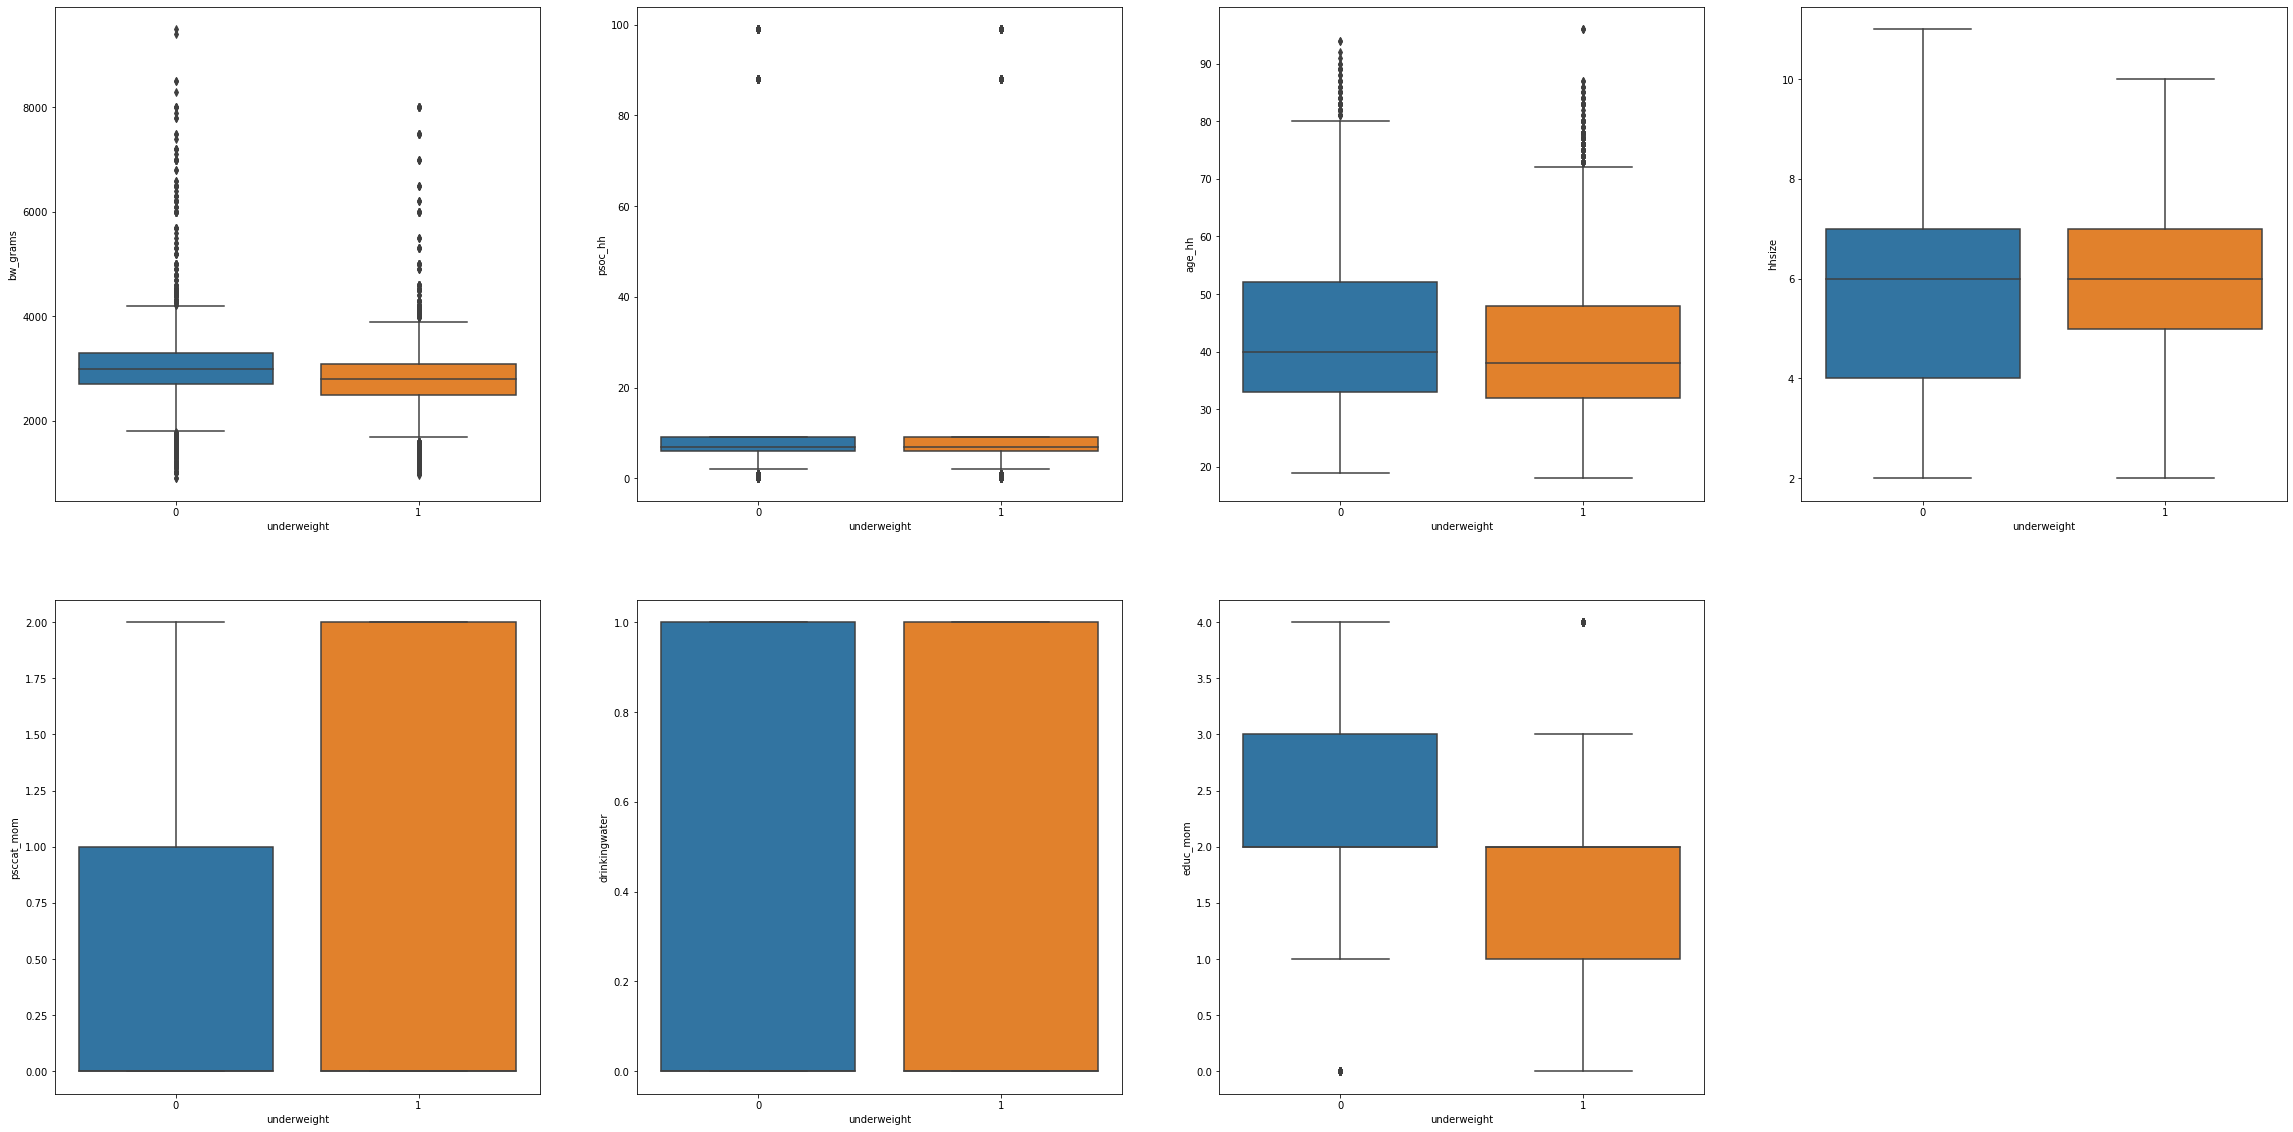

In [33]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="underweight", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('age_hh')
  
plt.subplot(2,4,4)
graph('hhsize')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('drinkingwater')

plt.subplot(2,4,7)
graph('educ_mom')
  
plt.show()

In [34]:
lr,ur=outlier(df_upsampled['age_hh'][df_upsampled.underweight==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.age_hh > ur) & (df_upsampled.underweight == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.age_hh < lr) & (df_upsampled.underweight == 0)],inplace=True)
df_upsampled.value_counts('underweight')

underweight
0    10553
1    10351
dtype: int64

In [35]:
lr,ur=outlier(df_upsampled['age_hh'][df_upsampled.underweight==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.age_hh > ur) & (df_upsampled.underweight == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.age_hh < lr) & (df_upsampled.underweight == 1)],inplace=True)
df_upsampled.value_counts('underweight')

underweight
0    10553
1    10117
dtype: int64

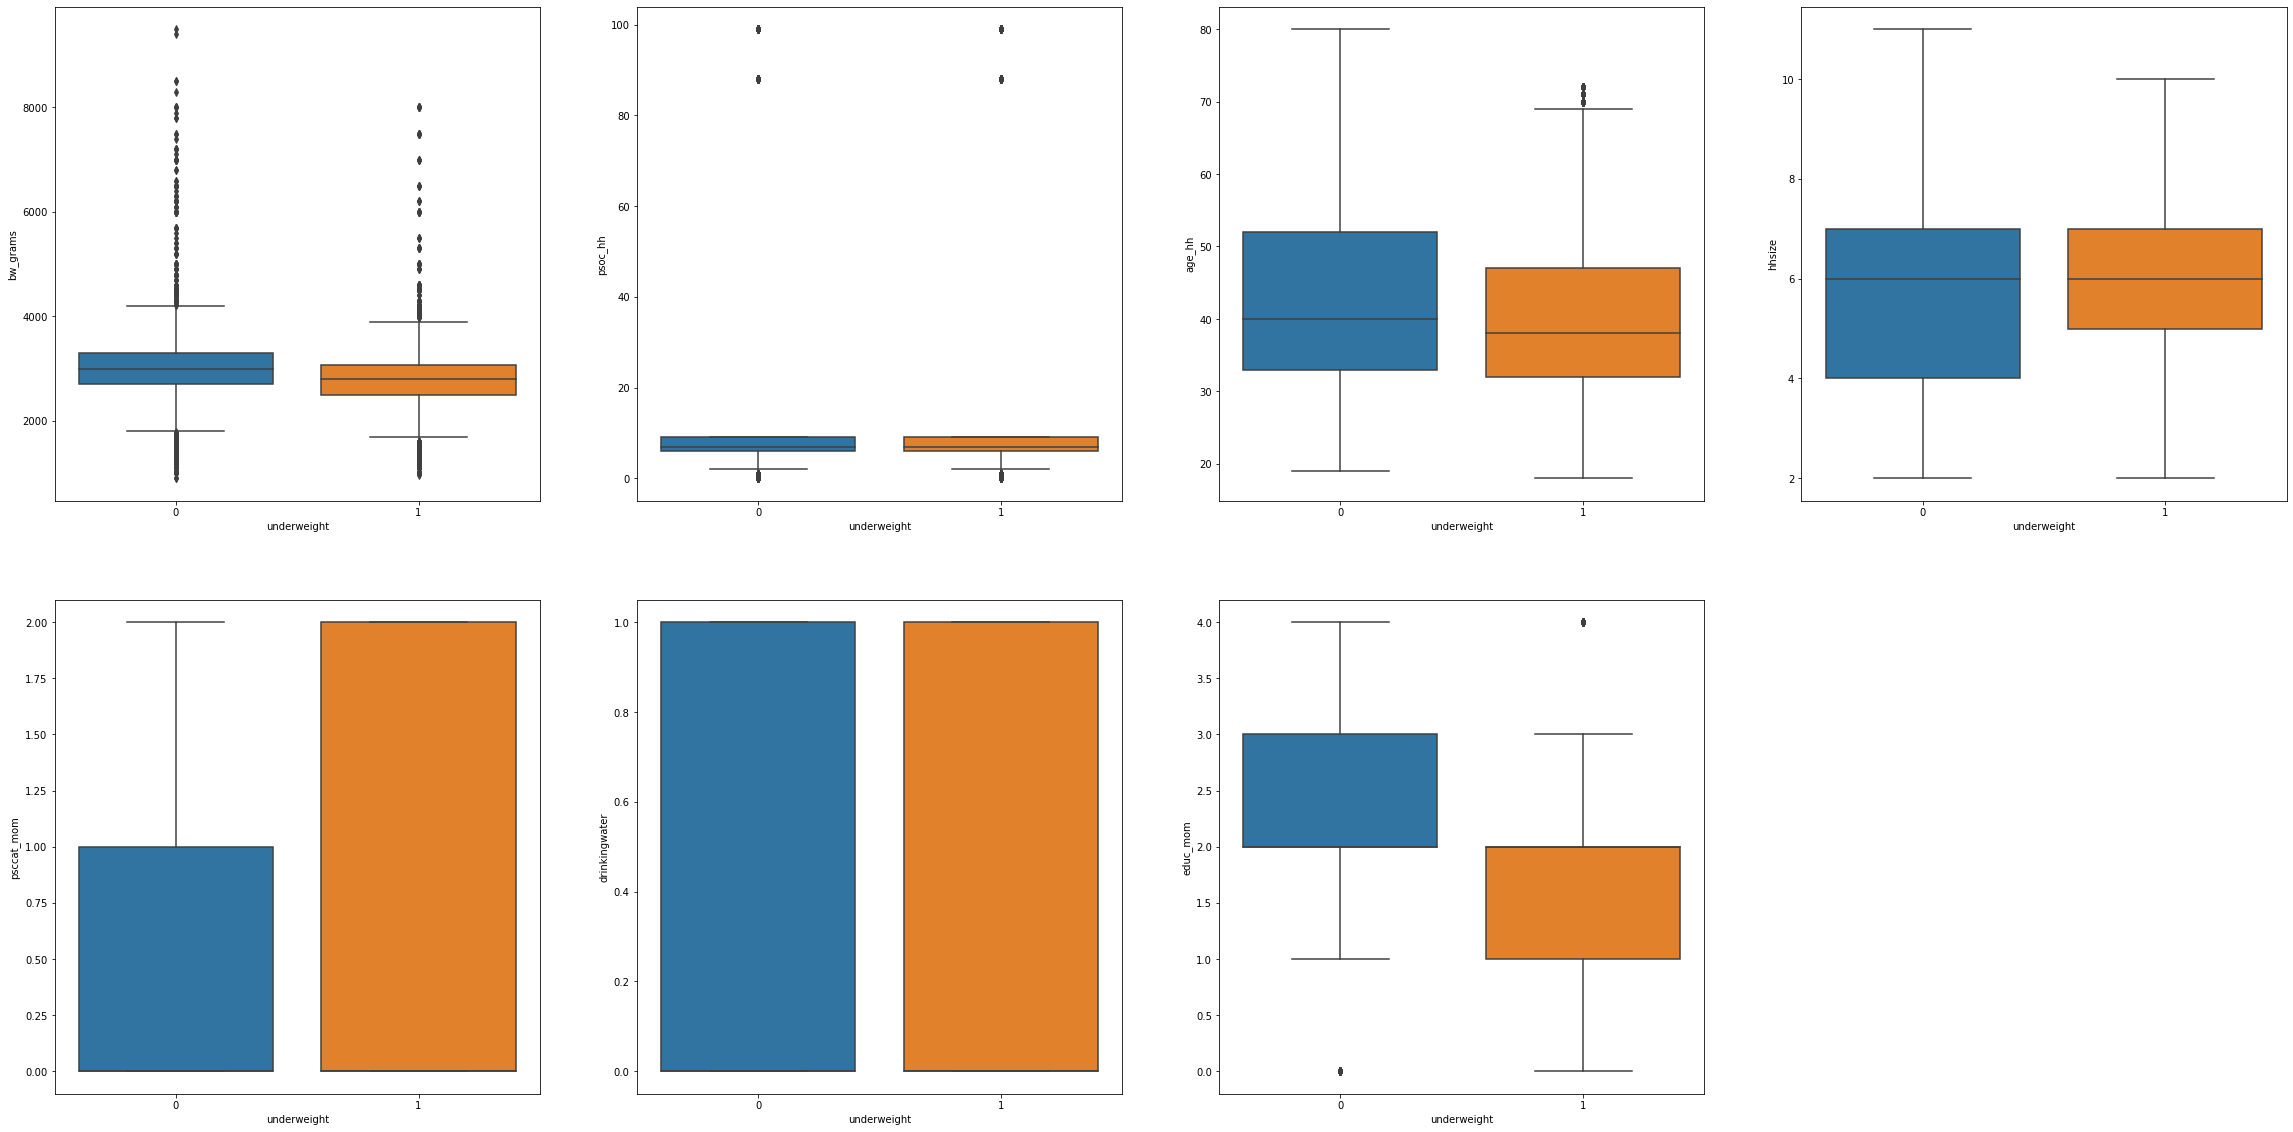

In [36]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="underweight", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('age_hh')
  
plt.subplot(2,4,4)
graph('hhsize')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('drinkingwater')

plt.subplot(2,4,7)
graph('educ_mom')
  
plt.show()

In [37]:
lr,ur=outlier(df_upsampled['age_hh'][df_upsampled.underweight==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.age_hh > ur) & (df_upsampled.underweight == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.age_hh < lr) & (df_upsampled.underweight == 1)],inplace=True)
df_upsampled.value_counts('underweight')

underweight
0    10553
1    10015
dtype: int64

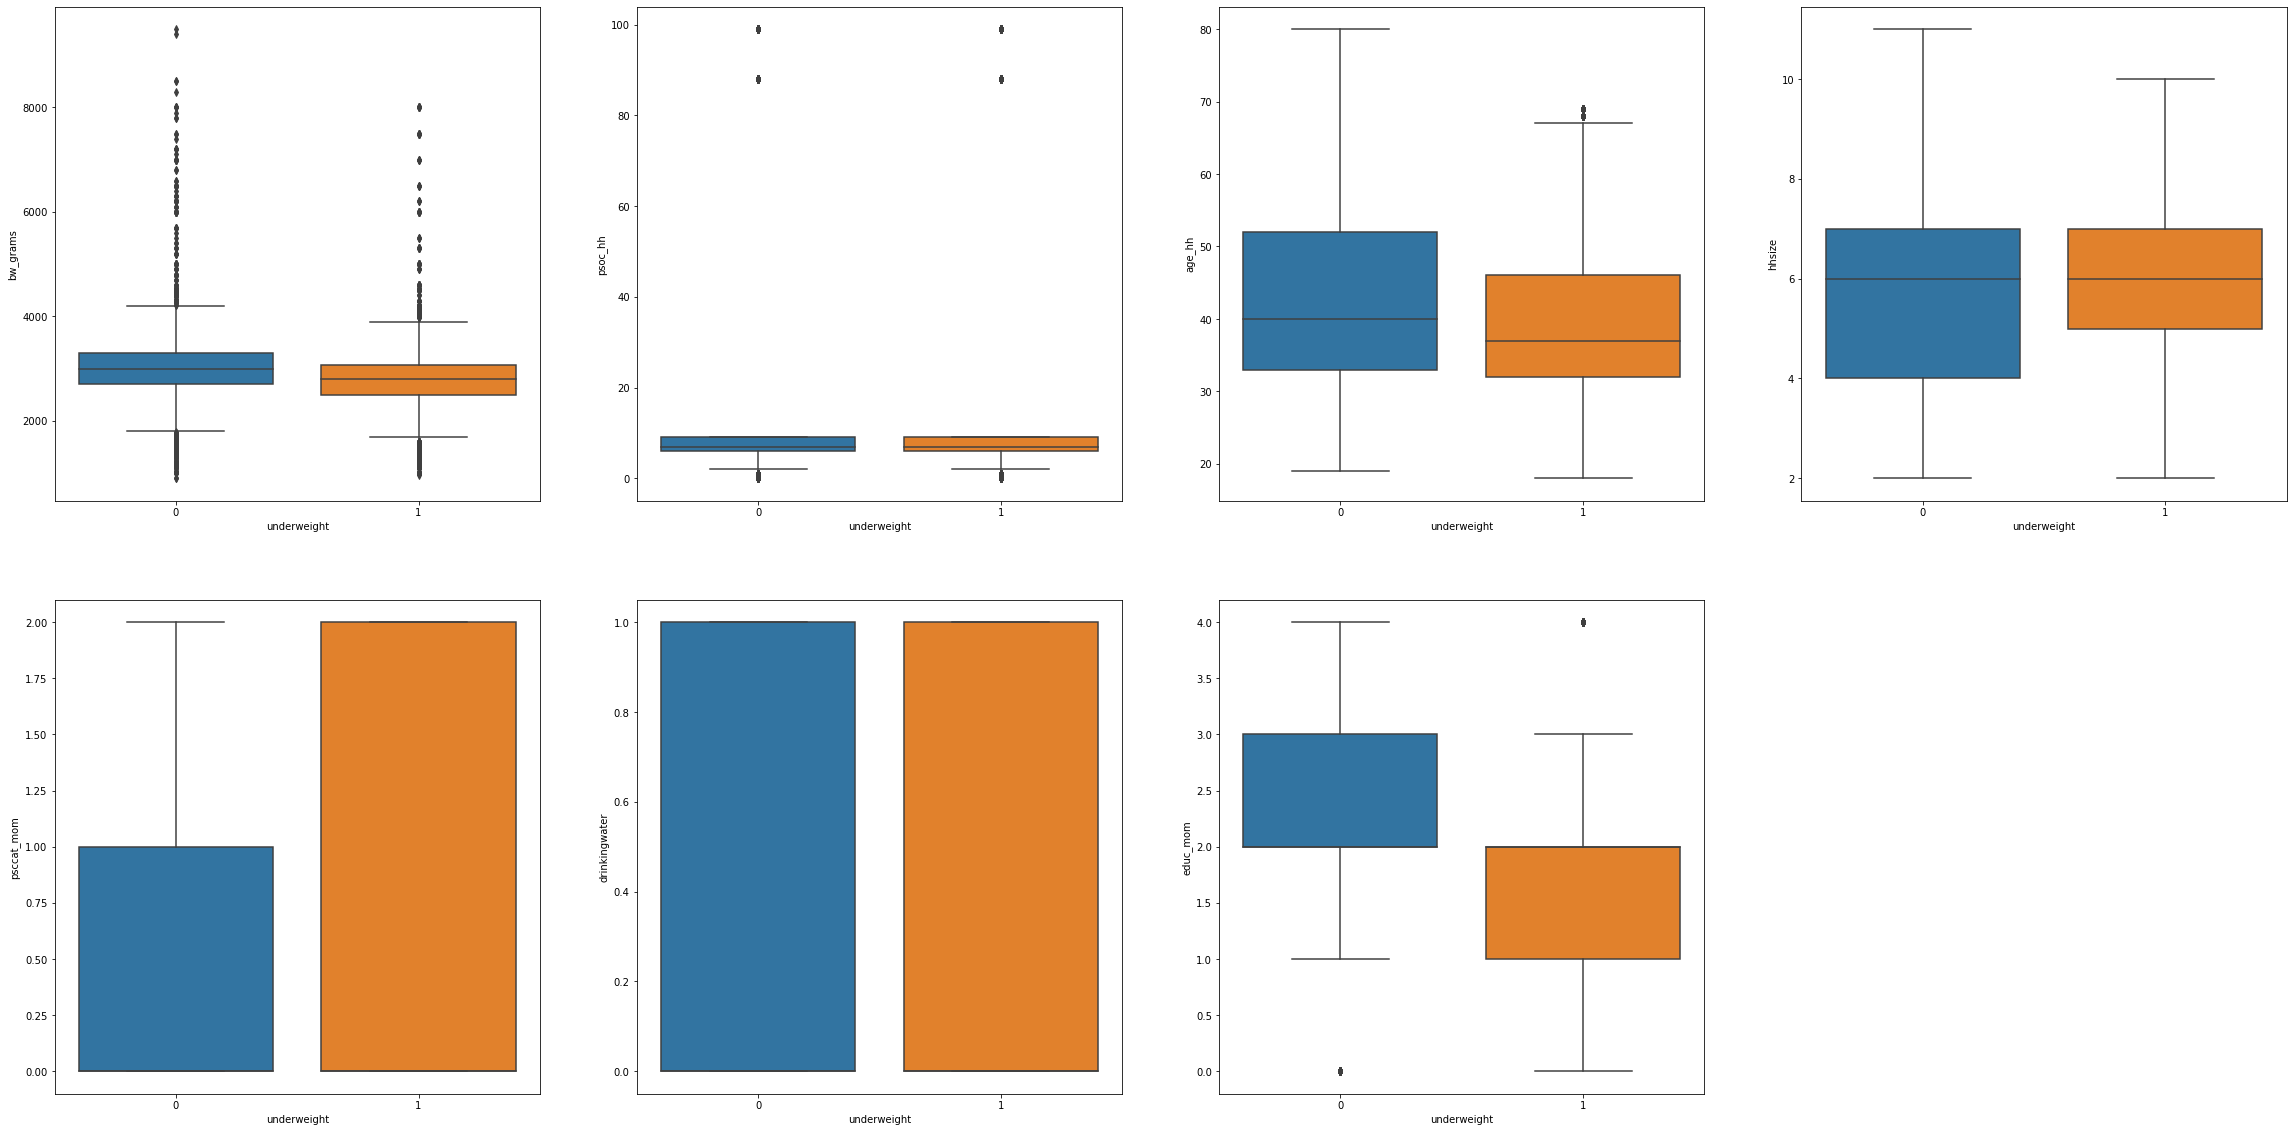

In [38]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="underweight", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('age_hh')
  
plt.subplot(2,4,4)
graph('hhsize')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('drinkingwater')

plt.subplot(2,4,7)
graph('educ_mom')
  
plt.show()

In [39]:
lr,ur=outlier(df_upsampled['age_hh'][df_upsampled.underweight==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.age_hh > ur) & (df_upsampled.underweight == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.age_hh < lr) & (df_upsampled.underweight == 1)],inplace=True)
df_upsampled.value_counts('underweight')

underweight
0    10553
1     9923
dtype: int64

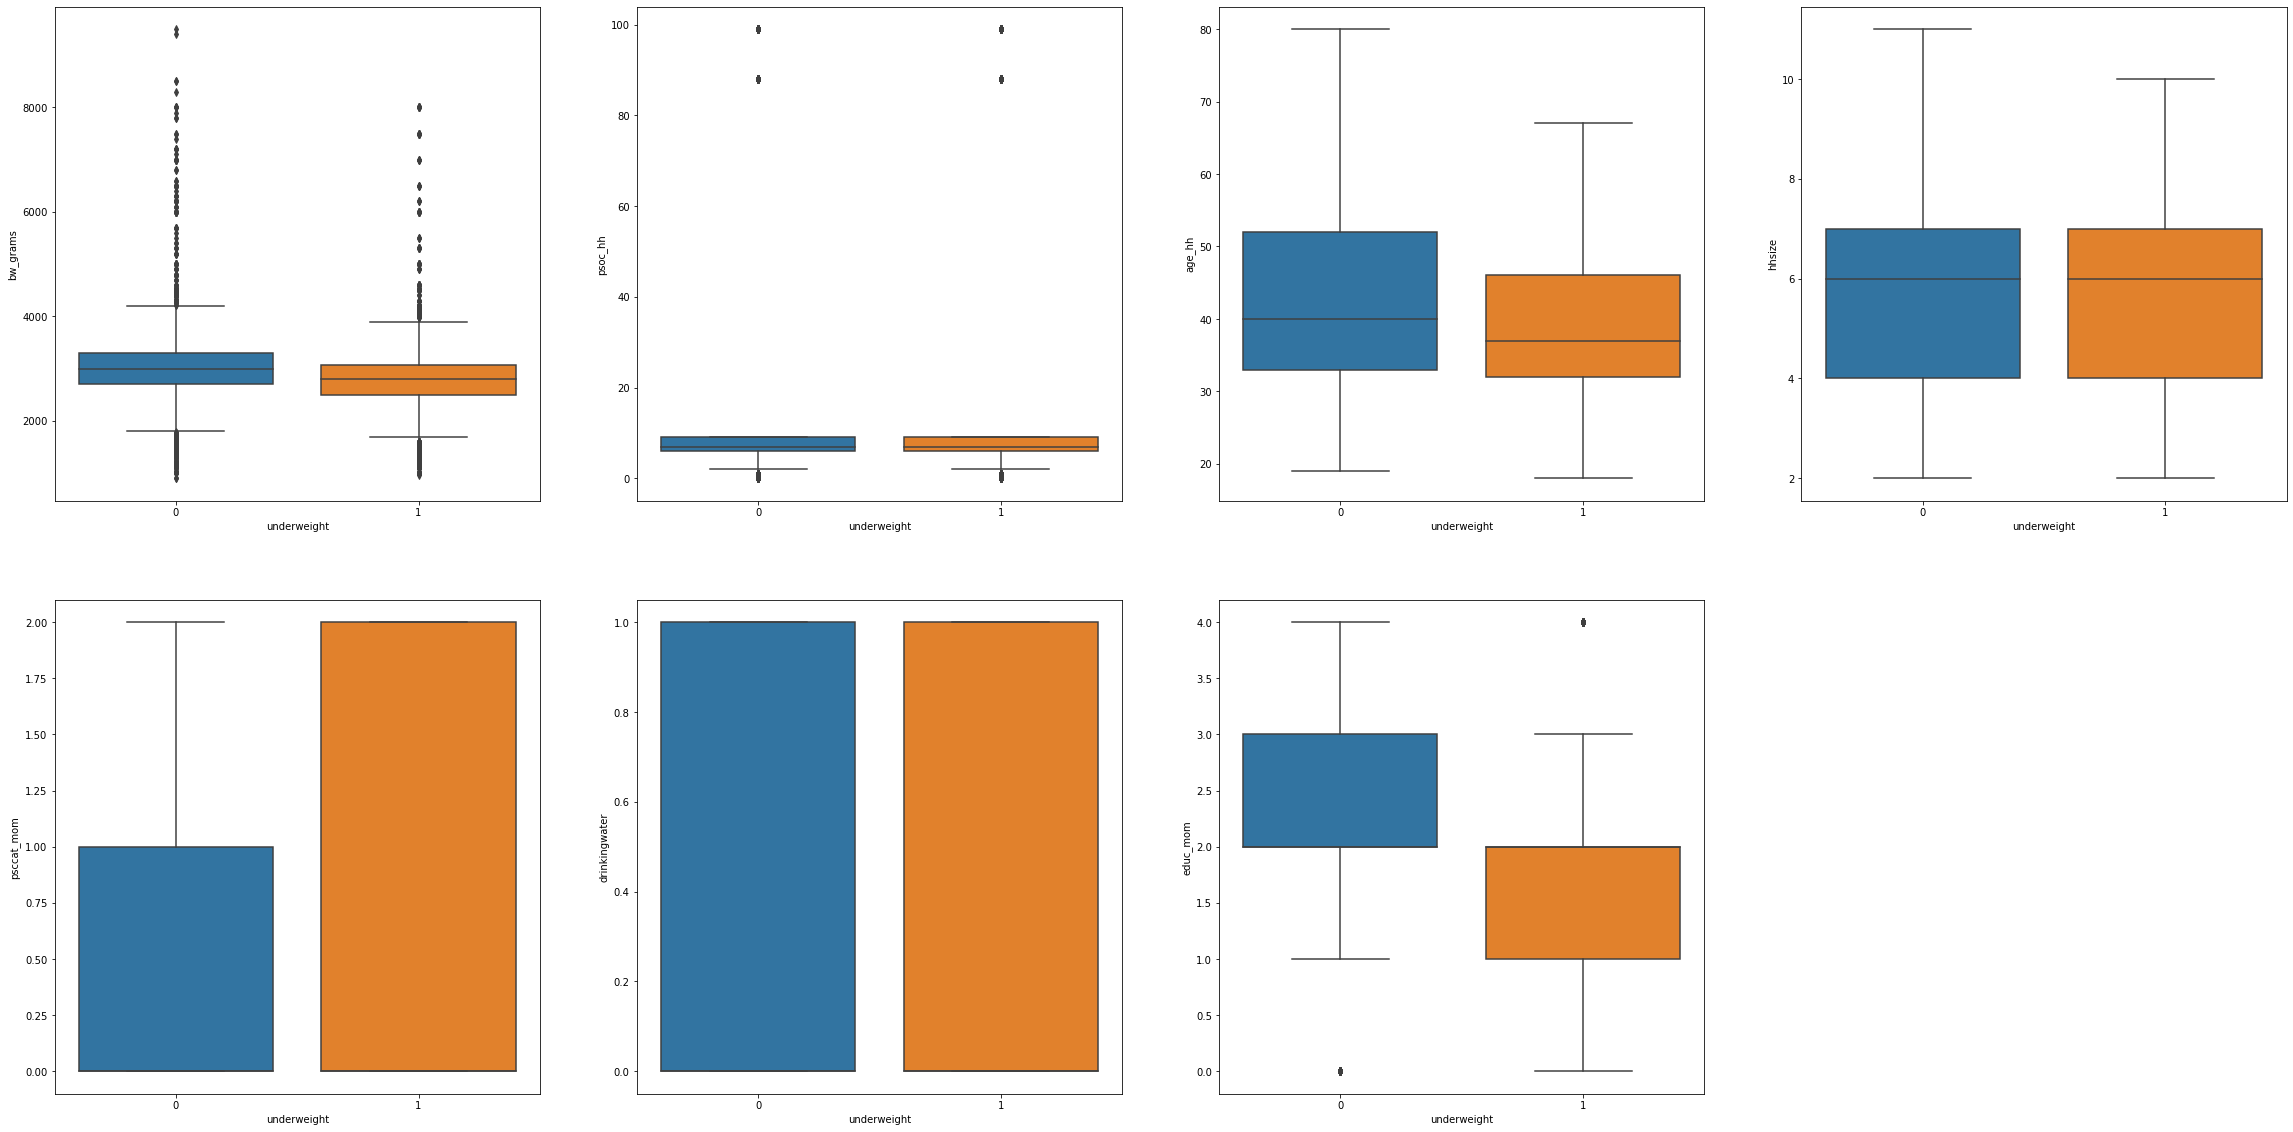

In [40]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="underweight", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('age_hh')
  
plt.subplot(2,4,4)
graph('hhsize')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('drinkingwater')

plt.subplot(2,4,7)
graph('educ_mom')
  
plt.show()

In [41]:
lr,ur=outlier(df_upsampled['psoc_hh'][df_upsampled.underweight==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.psoc_hh > ur) & (df_upsampled.underweight == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.psoc_hh < lr) & (df_upsampled.underweight == 0)],inplace=True)
df_upsampled.value_counts('underweight')

underweight
1    9923
0    8811
dtype: int64

In [42]:
lr,ur=outlier(df_upsampled['psoc_hh'][df_upsampled.underweight==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.psoc_hh > ur) & (df_upsampled.underweight == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.psoc_hh < lr) & (df_upsampled.underweight == 1)],inplace=True)
df_upsampled.value_counts('underweight')

underweight
1    9020
0    8811
dtype: int64

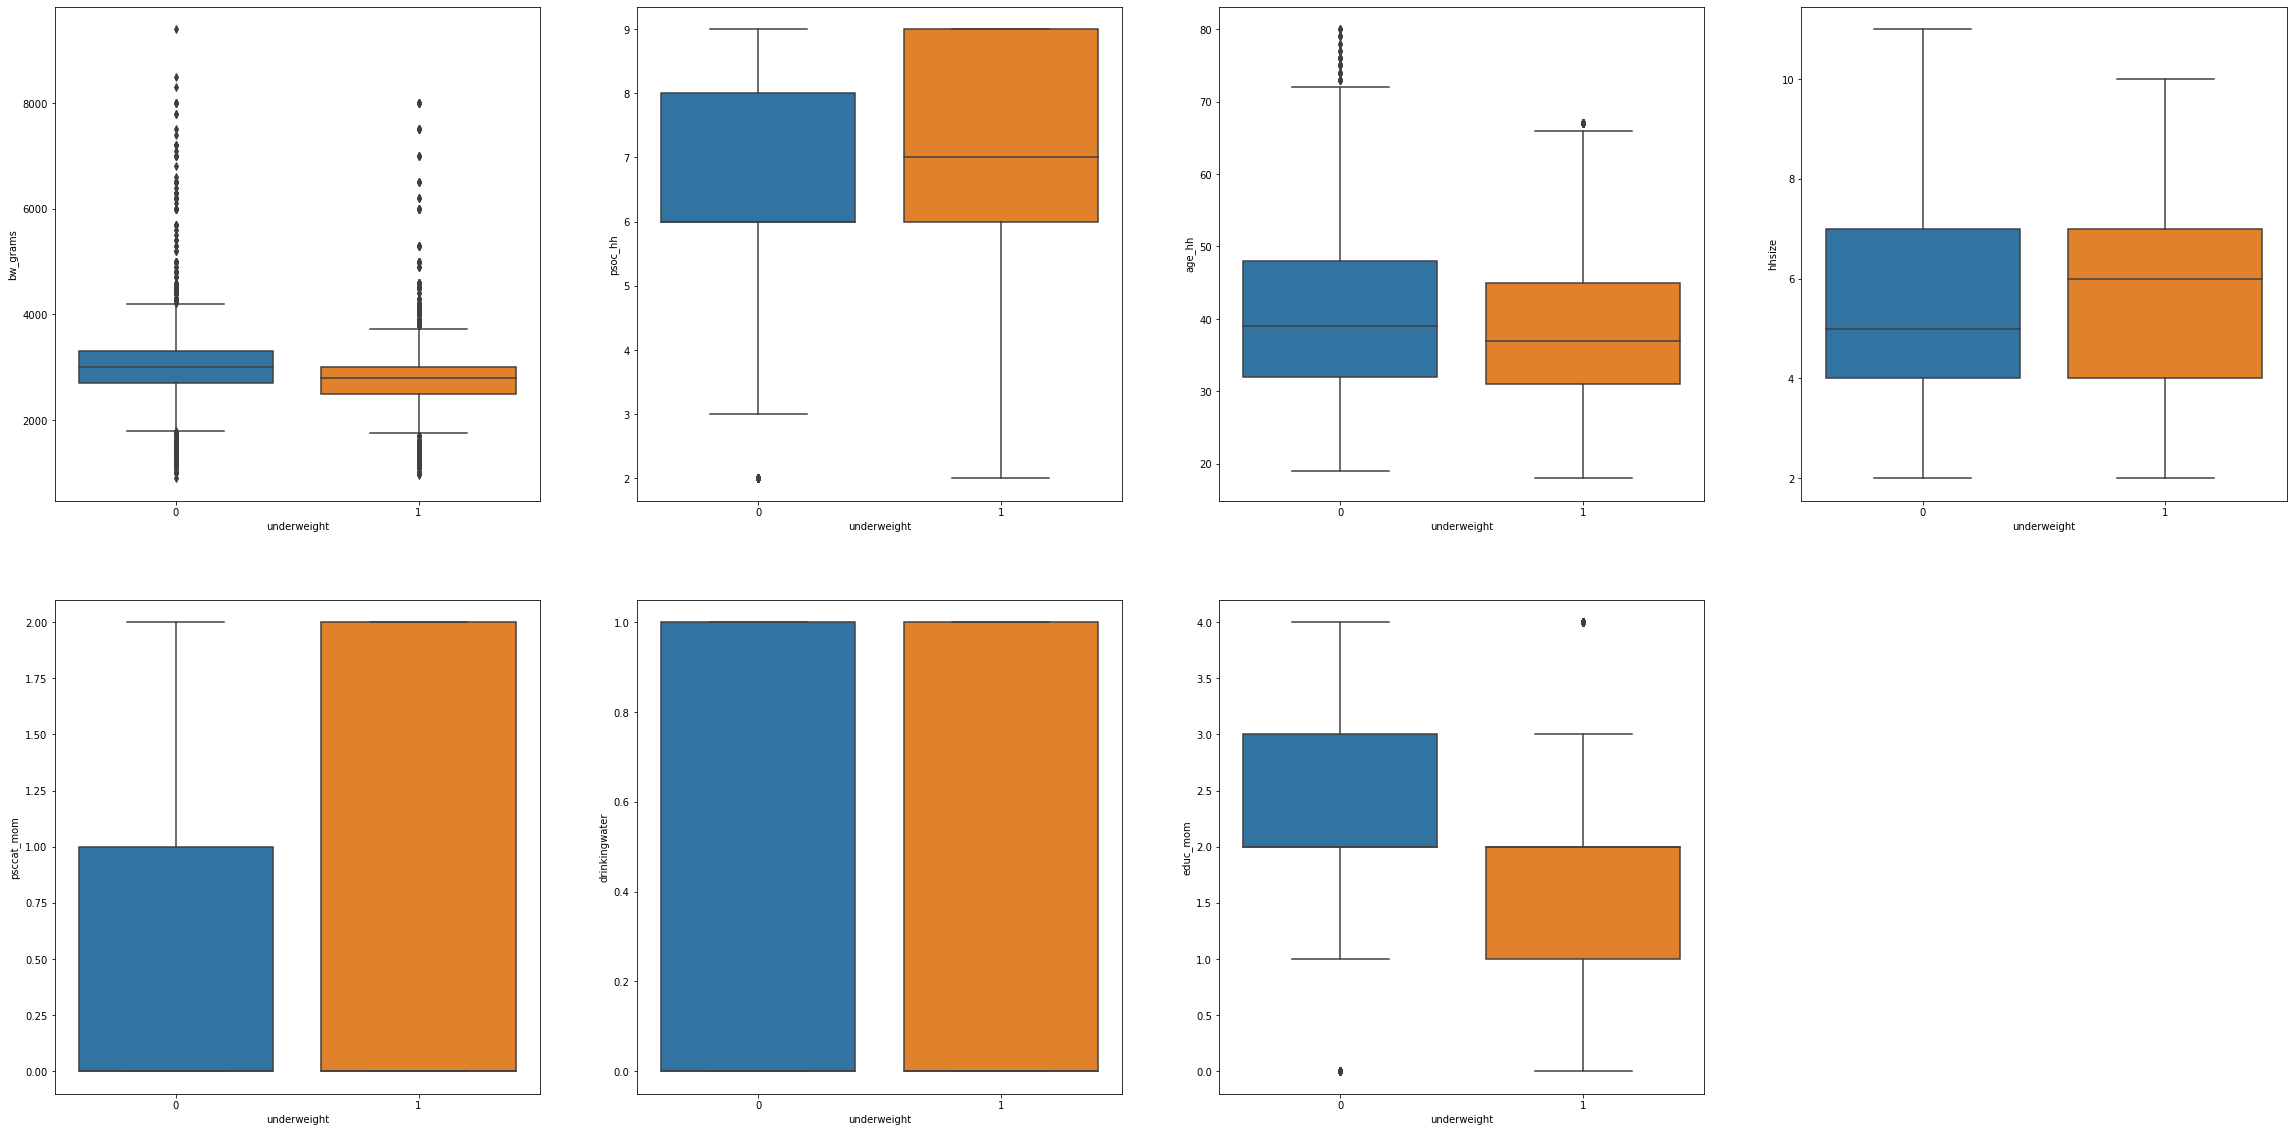

In [43]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="underweight", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('age_hh')
  
plt.subplot(2,4,4)
graph('hhsize')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('drinkingwater')

plt.subplot(2,4,7)
graph('educ_mom')
  
plt.show()

In [44]:
lr,ur=outlier(df_upsampled['bw_grams'][df_upsampled.underweight==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bw_grams > ur) & (df_upsampled.underweight == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bw_grams < lr) & (df_upsampled.underweight == 0)],inplace=True)
df_upsampled.value_counts('underweight')

underweight
1    9020
0    8543
dtype: int64

In [45]:
lr,ur=outlier(df_upsampled['bw_grams'][df_upsampled.underweight==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bw_grams > ur) & (df_upsampled.underweight == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bw_grams < lr) & (df_upsampled.underweight == 1)],inplace=True)
df_upsampled.value_counts('underweight')

underweight
0    8543
1    8484
dtype: int64

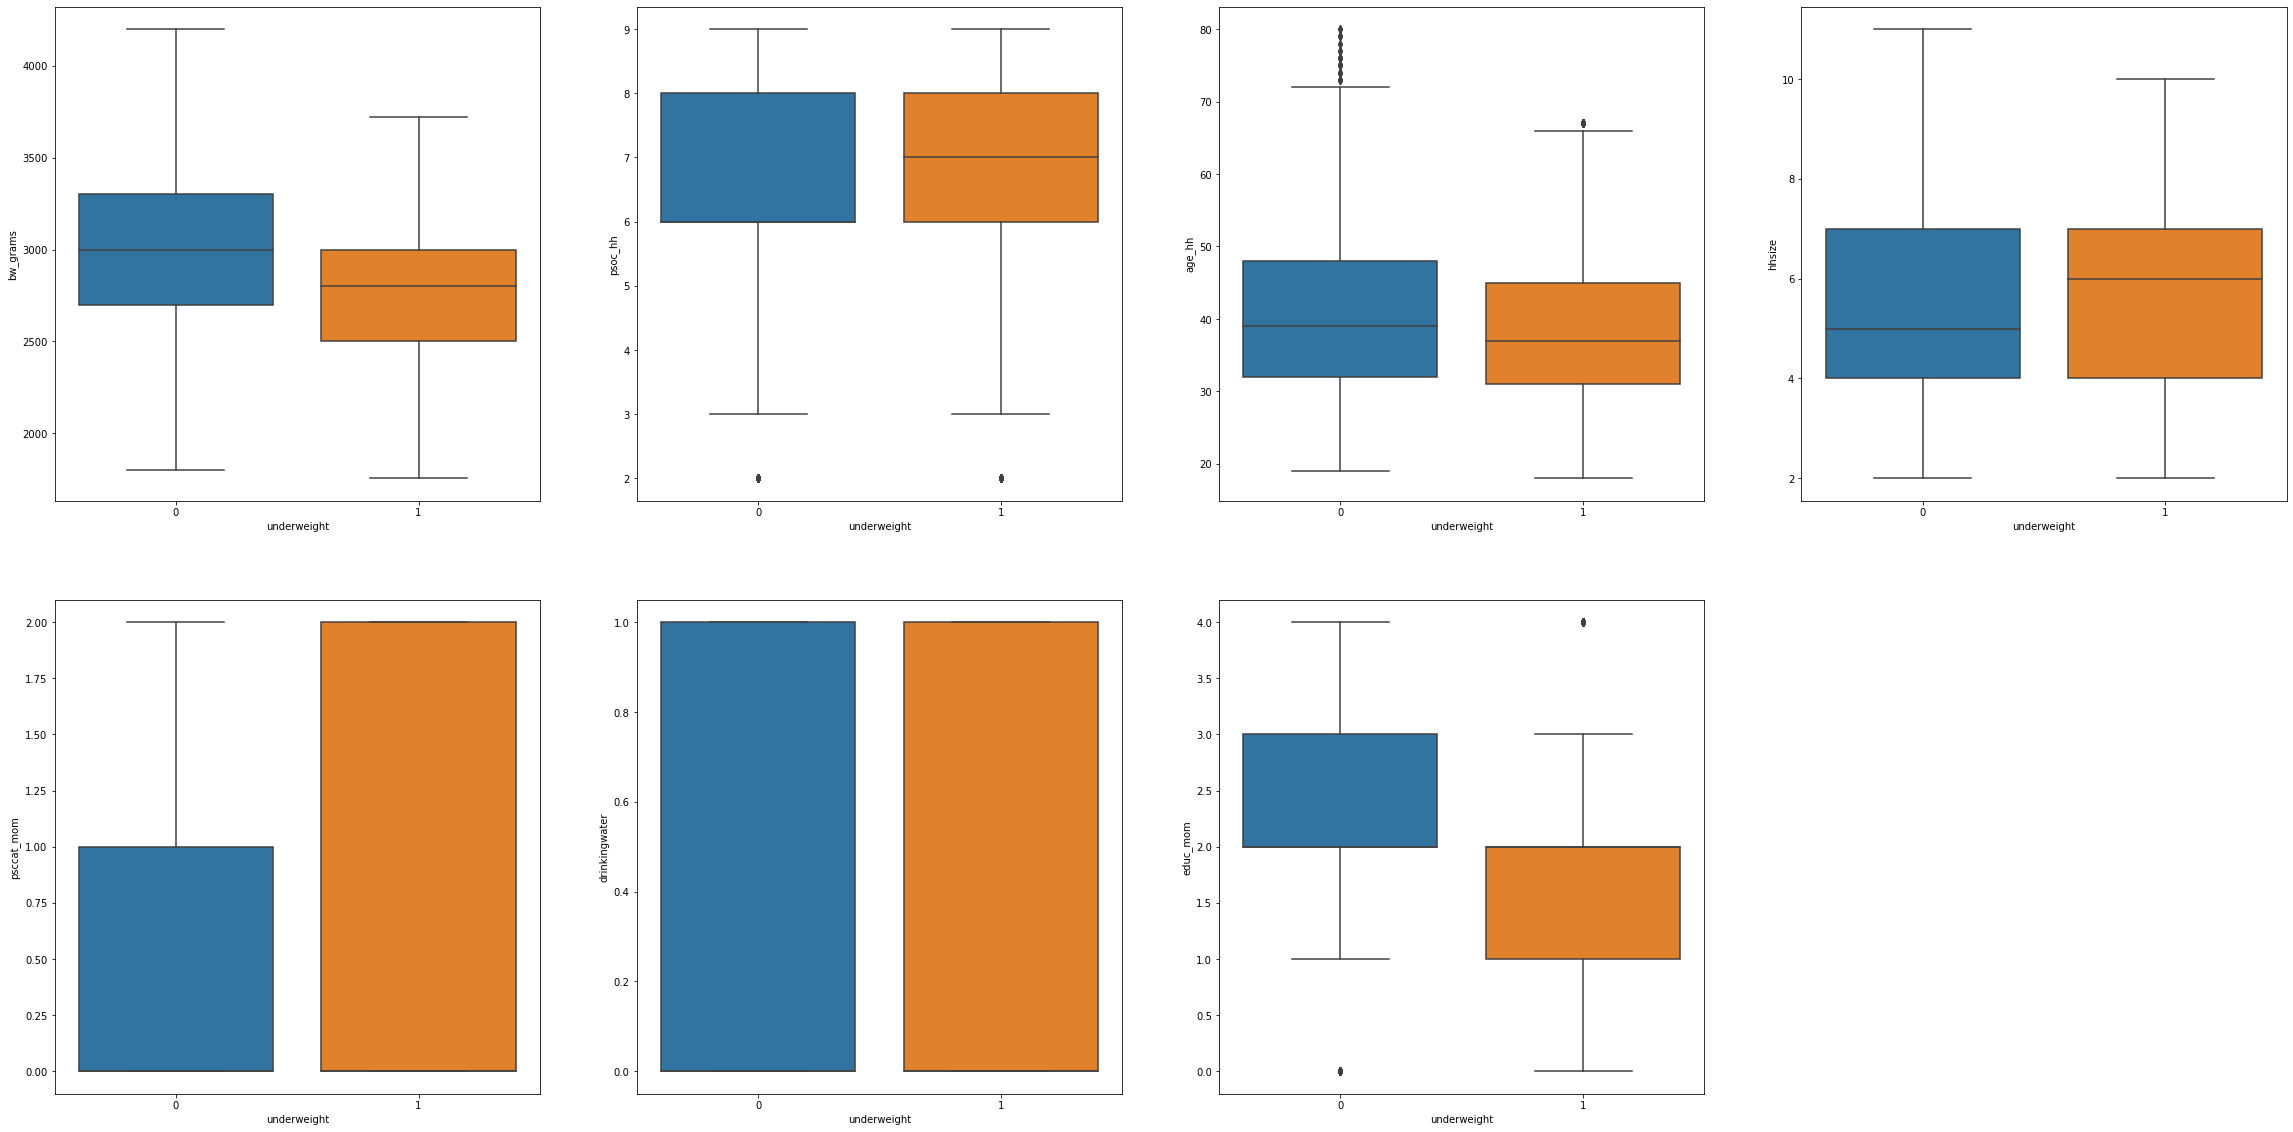

In [46]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="underweight", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('age_hh')
  
plt.subplot(2,4,4)
graph('hhsize')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('drinkingwater')

plt.subplot(2,4,7)
graph('educ_mom')
  
plt.show()

In [47]:
lr,ur=outlier(df_upsampled['age_hh'][df_upsampled.underweight==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.age_hh > ur) & (df_upsampled.underweight == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.age_hh < lr) & (df_upsampled.underweight == 0)],inplace=True)
df_upsampled.value_counts('underweight')

underweight
0    8494
1    8484
dtype: int64

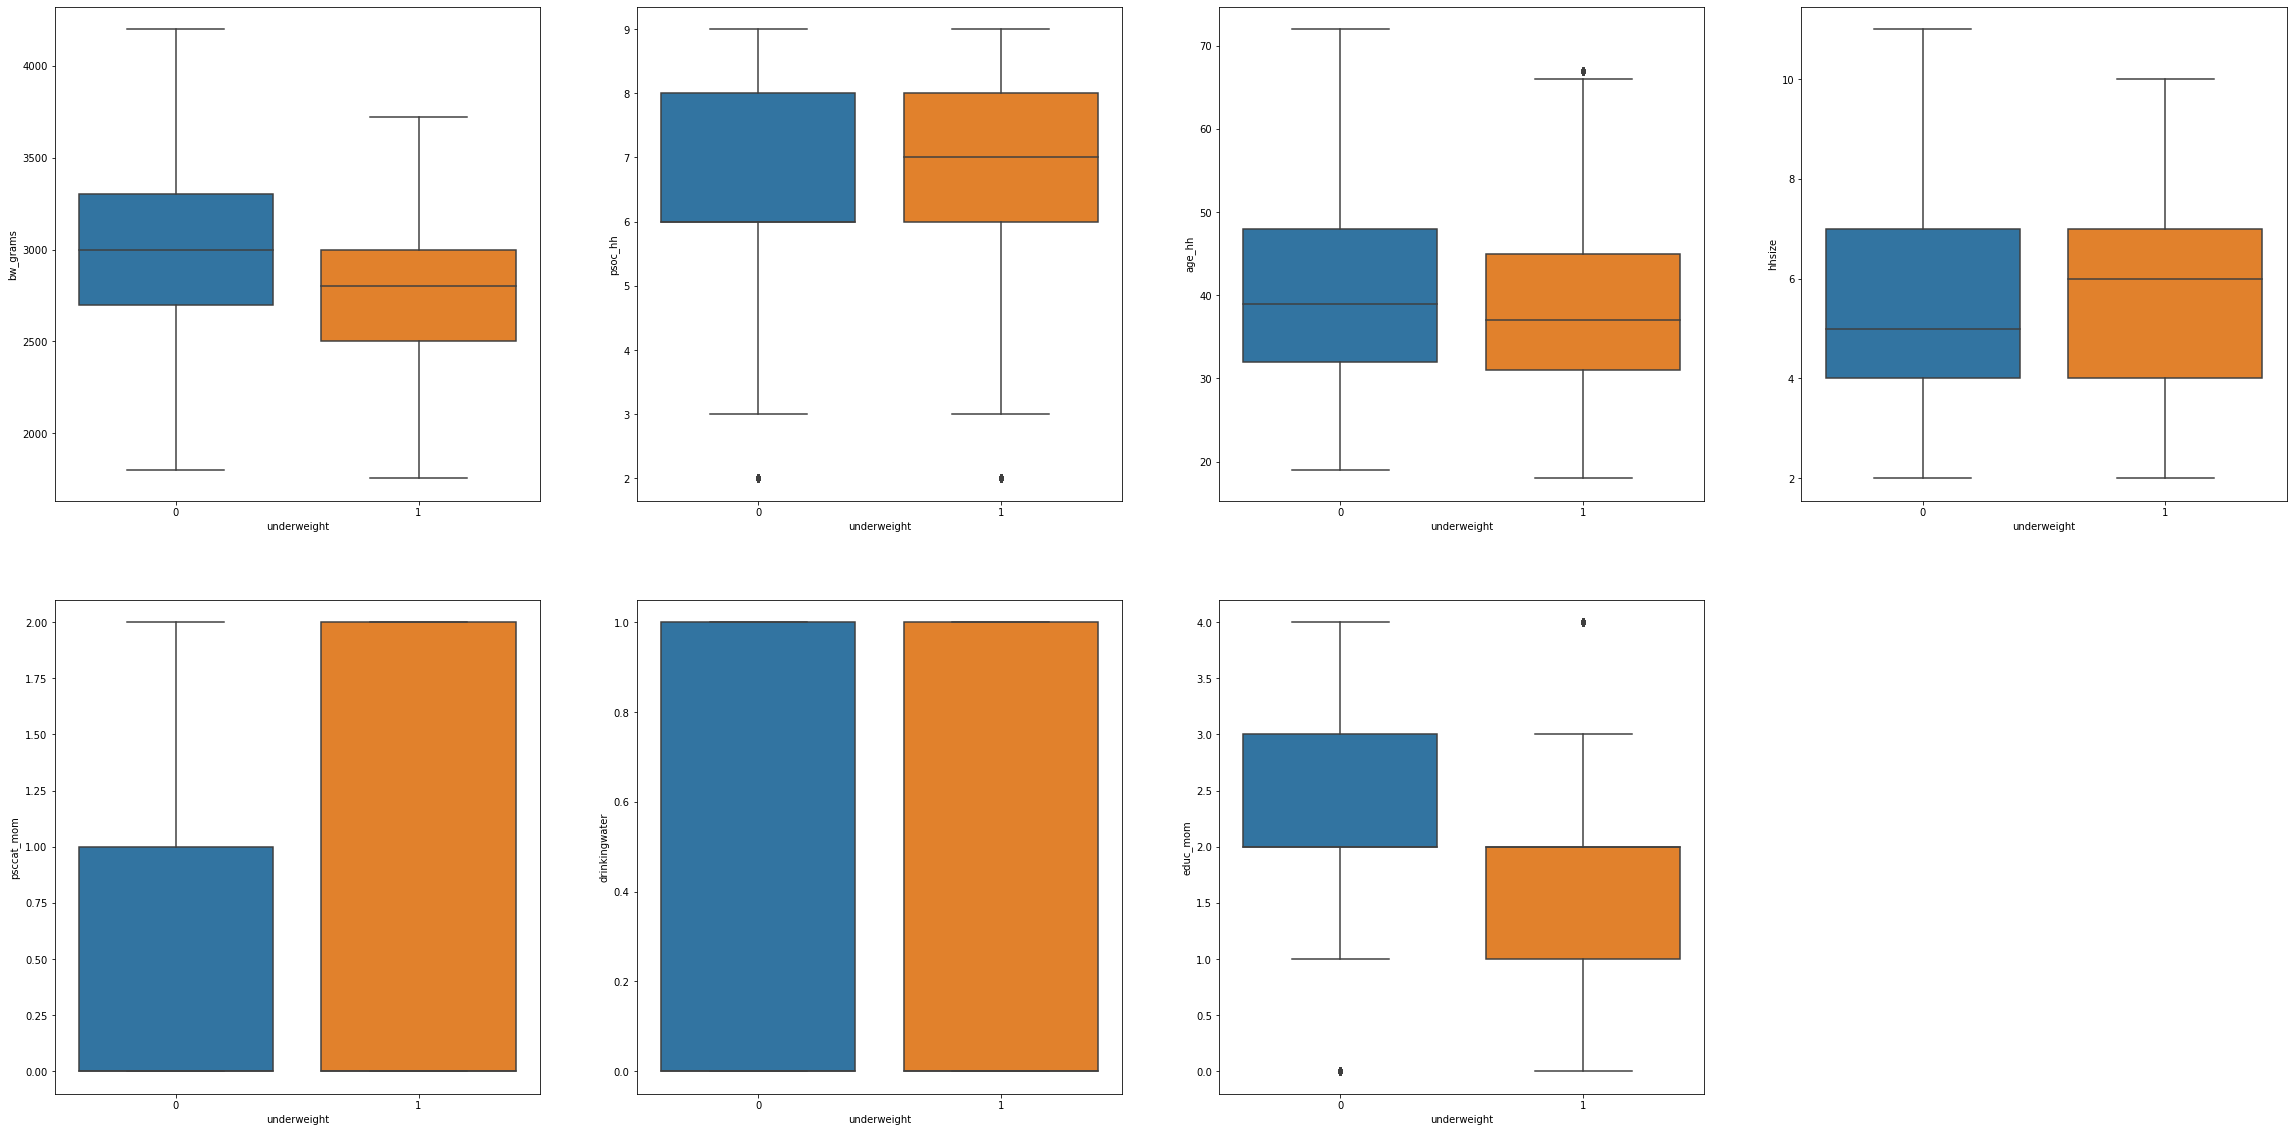

In [48]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="underweight", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('age_hh')
  
plt.subplot(2,4,4)
graph('hhsize')

plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('drinkingwater')

plt.subplot(2,4,7)
graph('educ_mom')
  
plt.show()

In [49]:
Final3 = df_upsampled[["bw_grams","psoc_hh","age_hh","hhsize",
           "psccat_mom","drinkingwater","educ_mom"]]
Target3 =df_upsampled['underweight']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final3,Target3,test_size = 0.2, random_state=42)

In [51]:
Final3.head()

,bw_grams,psoc_hh,age_hh,hhsize,psccat_mom,drinkingwater,educ_mom
3,3200,6,36,7,0,0,2
5,2700,8,44,8,0,1,3
6,3000,6,49,5,0,0,2
7,3500,7,46,7,0,1,1
8,3200,9,59,6,2,0,2


In [52]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.600
Accuracy score : 0.6042402826855123


C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))

pred_prob_rf = r_pred.predict_proba(X_test)

Training score: 0.990
Accuracy score:  0.8760306242638398


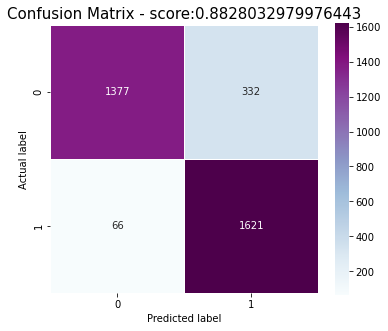

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      1709
           1       0.83      0.96      0.89      1687

    accuracy                           0.88      3396
   macro avg       0.89      0.88      0.88      3396
weighted avg       0.89      0.88      0.88      3396



In [54]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
rf_acc = accuracy_score(y_test,y_pred)

In [55]:
gbr = GradientBoostingClassifier(n_estimators=100, max_depth=10, max_features=3, random_state=0).fit(X_train, y_train)
gbr_pred= gbr.score(X_test, y_test)

gbr_train_accuracy =gbr.score(X_train,y_train)
gbr_accuracy = gbr.score(X_test,y_test)
pred_prob_gbr = gbr.predict_proba(X_test)


print("Training score: {:.3f}".format(gbr.score(X_train, y_train)))
print("Test score: {:.3f}".format(gbr.score(X_test, y_test)))

Training score: 0.932
Test score: 0.829


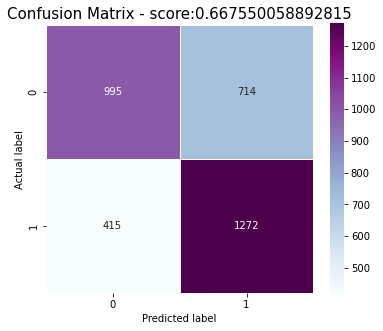

              precision    recall  f1-score   support

           0       0.71      0.58      0.64      1709
           1       0.64      0.75      0.69      1687

    accuracy                           0.67      3396
   macro avg       0.67      0.67      0.67      3396
weighted avg       0.67      0.67      0.67      3396



In [56]:
gbr_model=GradientBoostingClassifier(random_state=0)
gbr_test = gbr_model.fit(X_train,y_train)
y_pred_gbr=gbr_test.predict(X_test)
from sklearn import metrics
gbr_pred_randomstate= gbr.score(X_test, y_test)

gbr_cm = metrics.confusion_matrix(y_test, y_pred_gbr)
plt.figure(figsize=(6,5))
sns.heatmap(gbr_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_gbr))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_gbr))
gbr_acc=accuracy_score(y_test,y_pred_gbr)

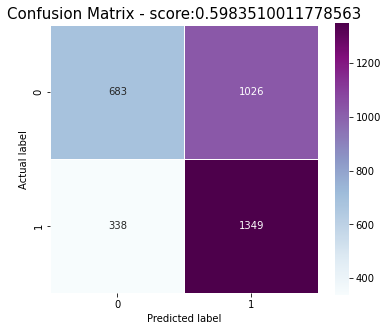

              precision    recall  f1-score   support

           0       0.67      0.40      0.50      1709
           1       0.57      0.80      0.66      1687

    accuracy                           0.60      3396
   macro avg       0.62      0.60      0.58      3396
weighted avg       0.62      0.60      0.58      3396



In [57]:
svc_model=SVC(random_state=0)
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)
from sklearn import metrics

svc_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(svc_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
svc_acc =accuracy_score(y_test,y_pred)


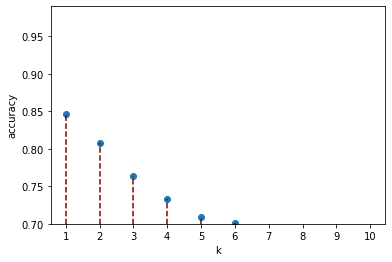

In [58]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed", colors='maroon')
plt.ylim(0.70,0.99)
plt.xticks([i for i in range(1,11)]);

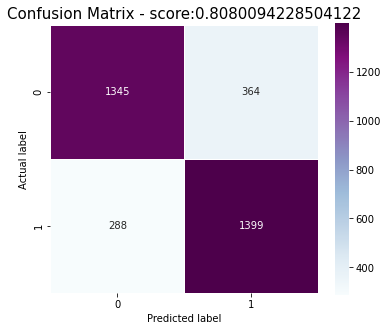

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1709
           1       0.79      0.83      0.81      1687

    accuracy                           0.81      3396
   macro avg       0.81      0.81      0.81      3396
weighted avg       0.81      0.81      0.81      3396



In [59]:
knn_model=KNeighborsClassifier(n_neighbors = 2)
knn_model.fit(X_train,y_train)
y_pred_knn=knn_model.predict(X_test)
from sklearn import metrics

knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(knn_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_knn))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_knn))
pred_prob_knn = gbr.predict_proba(X_test)
knn_pred_acc = accuracy_score(y_test,y_pred_knn)

In [60]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)
XB_pred = XB.score(X_test,y_test)
XB_train_accuracy = XB.score(X_train,y_train)
pred_prob_XB = XB.predict_proba(X_test)

print("Training accuracy = ",XB.score(X_train,y_train))
#Print Test Accuracy
XB_accuracy = XB.score(X_test,y_test)
print("Testing accuracy = ",XB.score(X_test,y_test))

Training accuracy =  0.8127668973641584
Testing accuracy =  0.7332155477031802


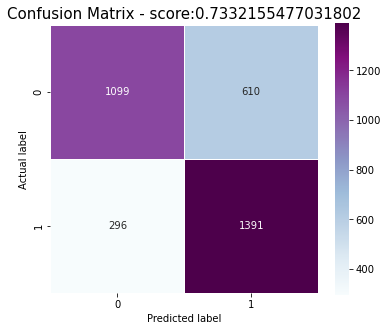

              precision    recall  f1-score   support

           0       0.79      0.64      0.71      1709
           1       0.70      0.82      0.75      1687

    accuracy                           0.73      3396
   macro avg       0.74      0.73      0.73      3396
weighted avg       0.74      0.73      0.73      3396



0.7332155477031802

In [61]:
XB_model=xgb.XGBClassifier()
XB_model.fit(X_train,y_train)
y_pred=XB_model.predict(X_test)
from sklearn import metrics

XB_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(XB_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
XG_BOOST = accuracy_score(y_test,y_pred)
XG_BOOST

In [62]:
#2. Gaussian Naive Bayes Classifier
#t0 = time()
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.score(X_test,y_test)
gnb_train_accuracy = gnb.score(X_train,y_train)
pred_prob_gnb = gnb.predict_proba(X_test)
gnb_acc = gnb.predict(X_test)

print("Training accuracy = ",gnb.score(X_train,y_train))
#Print Test Accuracy
gnb_accuracy = gnb.score(X_test,y_test)
print("Testing accuracy = ",gnb.score(X_test,y_test))
gnb_acc2 = accuracy_score(gnb_acc,y_test)
gnb_acc2

Training accuracy =  0.642467972316301
Testing accuracy =  0.6442873969375736


0.6442873969375736

In [63]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_log_reg[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_gbr[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob_XB[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob_gnb[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob_log_reg[:,1],multi_class='ovr')
auc_score2 = roc_auc_score(y_test, pred_prob_rf[:,1],multi_class='ovr')
auc_score3 = roc_auc_score(y_test, pred_prob_gbr[:,1],multi_class='ovr')
auc_score4 = roc_auc_score(y_test, pred_prob_knn[:,1],multi_class='ovr')
auc_score5 = roc_auc_score(y_test, pred_prob_XB[:,1],multi_class='ovr')
auc_score6 = roc_auc_score(y_test, pred_prob_gnb[:,1],multi_class='ovr')


print(auc_score1, auc_score2,auc_score3, auc_score4,auc_score5,auc_score6)

0.6494332629341577 0.9591234452840934 0.9120528267829958 0.9120528267829958 0.7995584934599523 0.6958911692795525


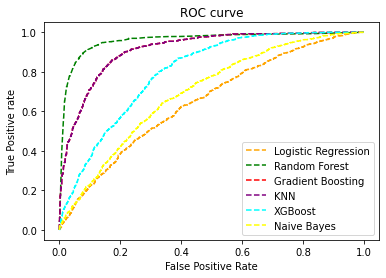

In [64]:
# plot roc curves
plt.plot(fpr1, tpr1,linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2,linestyle='--',color='green', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Gradient Boosting')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='cyan', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='Naive Bayes')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [65]:
predictions_acc = { "Model": ['Logistic Regression', 'Random Forest Classifier','Gradient Boosting Classifier', 'SVC','KNierest Neighbor','Exteme Gradient Boosting', 'Naive Bayes Classifier'],
"Accuracy": [ascore,rf_acc,gbr_accuracy,svc_acc,knn_pred_acc,XG_BOOST,gnb_acc2]}

In [66]:
model_acc = pd.DataFrame(predictions_acc, columns=["Model", "Accuracy"])
model_acc

,Model,Accuracy
0,Logistic Regression,0.604240
1,Random Forest Classifier,0.882803
2,Gradient Boosting Classifier,0.829211
3,SVC,0.598351
4,KNierest Neighbor,0.808009
5,Exteme Gradient Boosting,0.733216
6,Naive Bayes Classifier,0.644287


In [67]:
Model_Name = ['Logistic Regression', 'Random Forest Classifier','Gradient Boosting Classifier', 'SVC','KNierest Neighbor','XBoost', 'Naive Bayes Classifier']
Accuracy = [ascore,rf_acc,gbr_accuracy,svc_acc,knn_pred_acc,XG_BOOST,gnb_acc2]

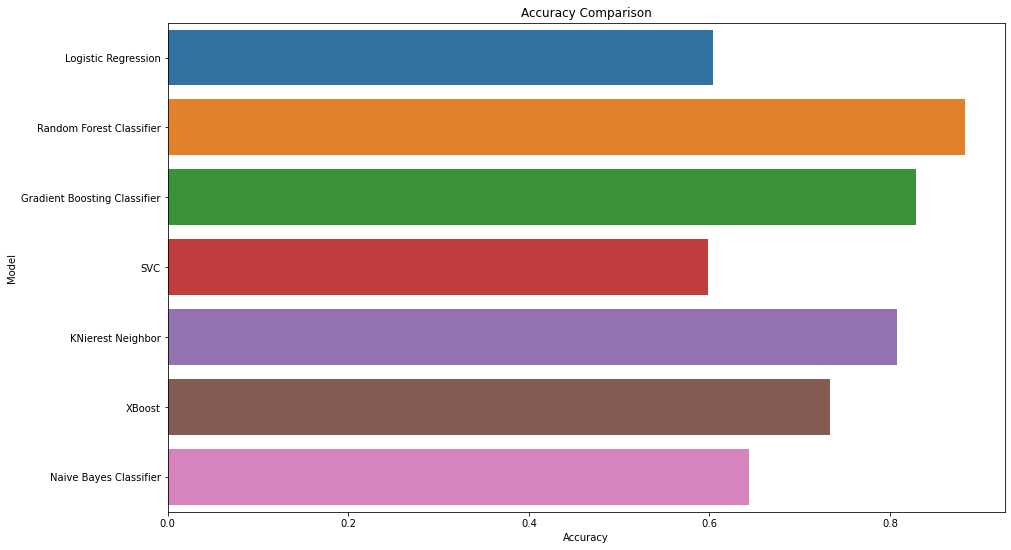

In [68]:
plt.figure(figsize=(15,9))
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
sns.barplot(x = Accuracy,y = Model_Name)
plt.show()

In [69]:
y_test_pred = rf_model.predict(X_test)
print("Accuracy Score of Random Forest:",accuracy_score(y_test,y_test_pred))

Accuracy Score of Random Forest: 0.8828032979976443


In [70]:
output = pd.DataFrame({'Real_class': y_test, 'Predicted_class': y_test_pred, 'Difference': y_test-y_test_pred})
output.head(10)

,Real_class,Predicted_class,Difference
7695,1,1,0
9382,0,0,0
4958,1,1,0
11237,0,0,0
6413,0,0,0
3675,1,1,0
9879,0,0,0
7464,0,0,0
11936,0,0,0
1374,1,1,0
